In [0]:
from google.colab import drive
drive.mount('/content/dataset')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/dataset


In [0]:
%tensorflow_version 1.x
import numpy as np
import tensorflow as tf


DATASET_PATH = '/content/dataset/My Drive/two/train'
test_dir = '/content/dataset/My Drive/two/test'
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 10
NUM_EPOCHS = 20
LEARNING_RATE =0.0005 


TensorFlow 1.x selected.


In [0]:

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=50,
featurewise_center = True,
featurewise_std_normalization = True,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.25,
zoom_range=0.1,
zca_whitening = True,
channel_shift_range = 20,
horizontal_flip = True ,
vertical_flip = True ,
validation_split = 0.2,
fill_mode='constant')
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
target_size=IMAGE_SIZE,
shuffle=True,
batch_size=BATCH_SIZE,
subset = "training",
seed=42,
class_mode="binary",
 
)
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
target_size=IMAGE_SIZE,
shuffle=True,
batch_size=BATCH_SIZE,
subset = "validation",
seed=42,
class_mode="binary",
)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 
optimizer=optimizers.Adam(lr=LEARNING_RATE),
metrics=['acc'])





58892288/58889256 [==============================] - 2s 0us/step








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
steps_per_epoch =STEP_SIZE_TRAIN,
validation_data = valid_batches,
validation_steps = STEP_SIZE_VALID,
epochs= NUM_EPOCHS,
)



Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 49s 5s/step - loss: 0.7621 - acc: 0.5840 - val_loss: 0.3499 - val_acc: 0.9000
Epoch 2/20
10/10 [==============================] - 8s 771ms/step - loss: 0.3517 - acc: 0.8657 - val_loss: 0.2482 - val_acc: 0.9375
Epoch 3/20
10/10 [==============================] - 3s 307ms/step - loss: 0.3487 - acc: 0.8800 - val_loss: 0.2177 - val_acc: 0.9375
Epoch 4/20
10/10 [==============================] - 4s 364ms/step - loss: 0.2062 - acc: 0.9397 - val_loss: 0.2025 - val_acc: 0.9000
Epoch 5/20
10/10 [==============================] - 4s 363ms/step - loss: 0.1719 - acc: 0.9598 - val_loss: 0.1336 - val_acc: 0.9375
Epoch 6/20
10/10 [==============================] - 3s 299ms/step - loss: 0.2319 - acc: 0.9221 - val_loss: 0.1255 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 3s 337ms/step - loss: 0.1618 - acc: 0.9300 - val_loss: 0.1185 - val_acc: 0.9500
Epoch 8/20
10/10 [==============================] - 4s 383ms/step - loss: 0.2386 - acc: 0

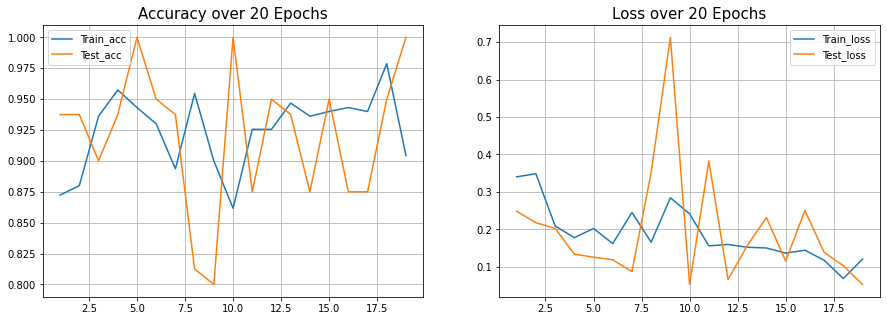

In [0]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 acc = result.history['acc']
 loss = result.history['loss']
 val_acc = result.history['val_acc']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(result, 20)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(
test_dir,target_size=IMAGE_SIZE,
batch_size=1,
shuffle=False,
seed=42,
 
 
class_mode="binary")
eval_generator.reset()
x = model.evaluate_generator(eval_generator,
steps = np.ceil(len(eval_generator) / BATCH_SIZE),
use_multiprocessing = False,
verbose = 1,
workers=1
)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 18 images belonging to 2 classes.
2/2 [==============================] - 1s 480ms/step
Test loss: 0.02176894946023822
Test accuracy: 1.0


1000/1000 [==============================] - 34s 34ms/step
Predictions finished
covid/nejmoa2001191_f3-PA.jpeg


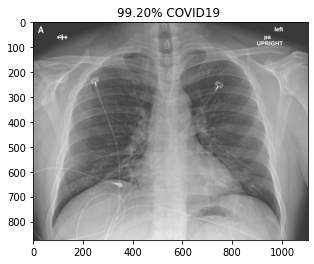

covid/nejmoa2001191_f4.jpeg


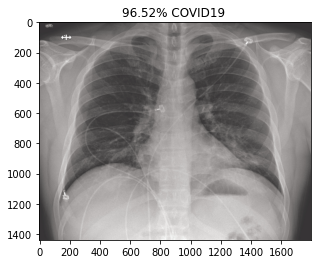

covid/nejmoa2001191_f5-PA.jpeg


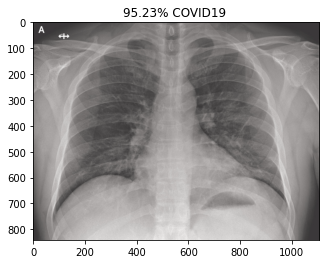

covid/radiol.2020200490.fig3.jpeg


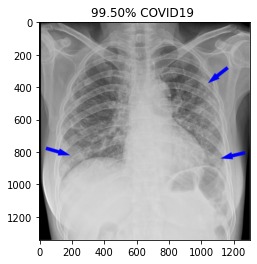

covid/ryct.2020200028.fig1a.jpeg


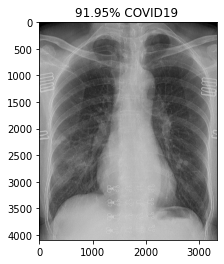

covid/ryct.2020200034.fig2.jpeg


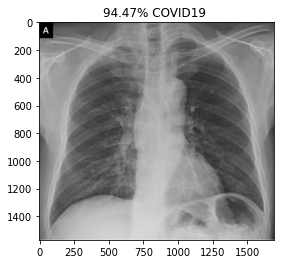

covid/ryct.2020200034.fig5-day0.jpeg


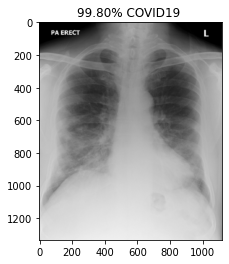

covid/ryct.2020200034.fig5-day4.jpeg


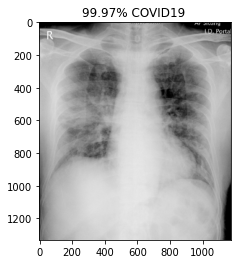

covid/ryct.2020200034.fig5-day7.jpeg


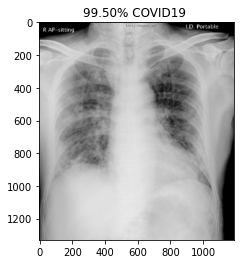

normal/NORMAL2-IM-1385-0001.jpeg


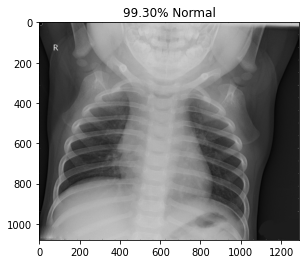

normal/NORMAL2-IM-1396-0001.jpeg


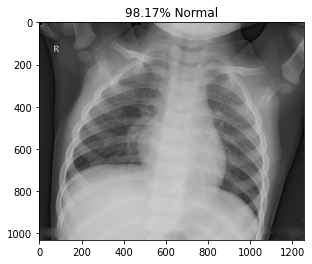

normal/NORMAL2-IM-1400-0001.jpeg


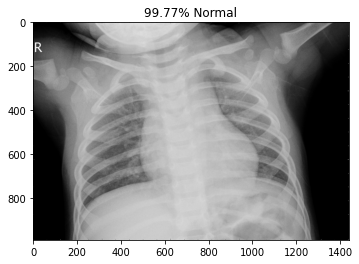

normal/NORMAL2-IM-1401-0001.jpeg


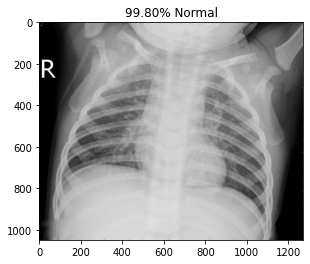

normal/NORMAL2-IM-1406-0001.jpeg


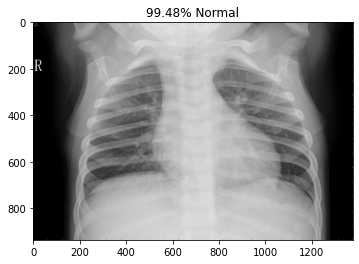

normal/NORMAL2-IM-1412-0001.jpeg


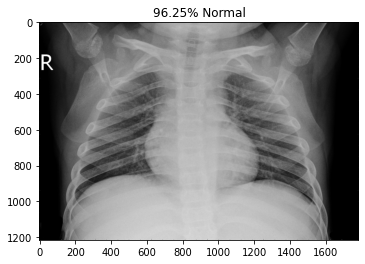

normal/NORMAL2-IM-1419-0001.jpeg


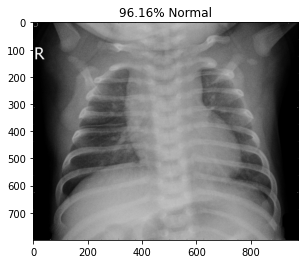

normal/NORMAL2-IM-1422-0001.jpeg


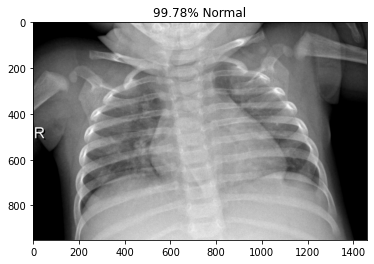

normal/NORMAL2-IM-1423-0001.jpeg


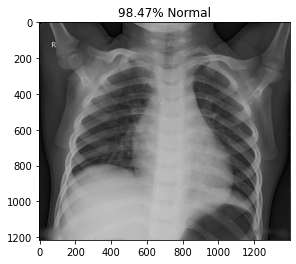

IndexError: ignored

In [0]:
eval_generator.reset() 
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
  image_path = test_dir + "/" +eval_generator.filenames[index]
  image = mpimg.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  pixels = np.array(image)
  plt.imshow(pixels)
  print(eval_generator.filenames[index])
  if probability > 0.5:
    plt.title("%.2f" % (probability[0]*100) + "% Normal")
  else:
    plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 ")
  plt.show()